<a href="https://colab.research.google.com/github/SHAIK-MOHAMMAD-IRFAN27/VR-mini-project/blob/main/VR_TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#!pip install tensorflow


In [3]:
#!pip install tensorflow


In [4]:
!pip install opencv-python


In [5]:
import tensorflow as tf
import os
import cv2
import imghdr
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,AveragePooling2D,Dropout, BatchNormalization
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau


<ipython-input-5-2460ce9af290>:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir="/content/drive/My Drive/FaceMaskDataset"

In [7]:
os.listdir(data_dir)

['without_mask', 'with_mask']

In [8]:
without_mask_dir = "/content/drive/My Drive/FaceMaskDataset/without_mask"
with_mask_dir = "/content/drive/My Drive/FaceMaskDataset/with_mask"

In [9]:
without_mask_images=os.listdir(without_mask_dir)

In [10]:
len(without_mask_images)

1000

In [11]:
with_mask_images=os.listdir(with_mask_dir)

In [12]:
len(with_mask_images)

997

In [13]:
image_path=os.path.join(without_mask_dir, without_mask_images[5])

In [14]:
image = cv2.imread(image_path)

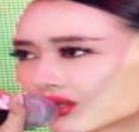

In [15]:
cv2_imshow(image)

In [16]:
image_path=os.path.join(with_mask_dir, with_mask_images[2])

In [17]:
image = cv2.imread(image_path)

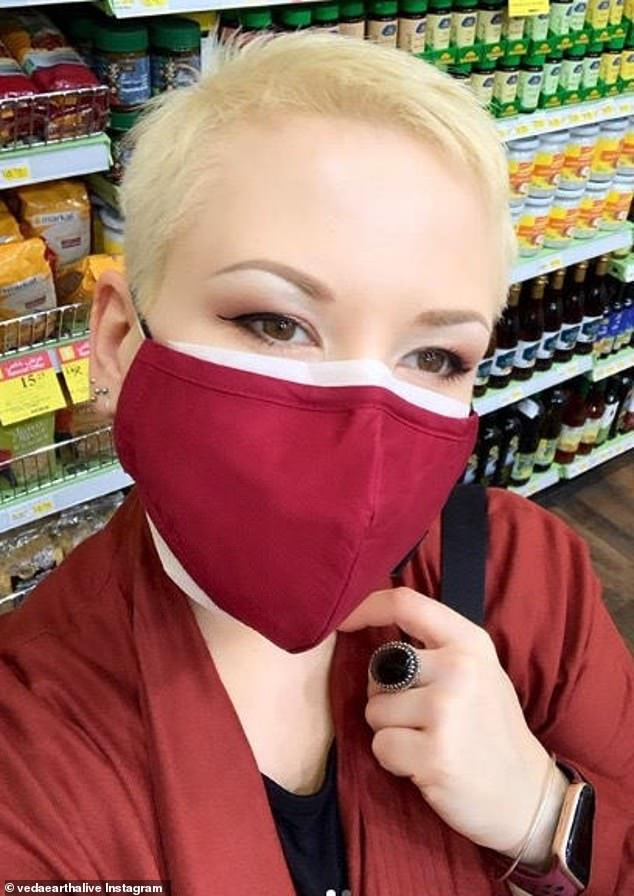

In [18]:
cv2_imshow(image)

In [19]:
tf.keras.utils.image_dataset_from_directory??

In [20]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1997 files belonging to 2 classes.


In [21]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
type(data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [23]:
data_iterator=data.as_numpy_iterator()

In [24]:
batch=data_iterator.next()

In [25]:
type(batch)

tuple

In [26]:
(image,labels)=batch

In [27]:
image.shape

(32, 256, 256, 3)

In [28]:
labels.shape

(32,)

In [29]:
len(batch)

2

In [30]:
len(batch[0])

32

In [31]:
len(batch[1])

32

In [32]:
batch[0].shape

(32, 256, 256, 3)

In [33]:
batch[1].shape

(32,)

In [34]:
batch[0].max()

np.float32(255.0)

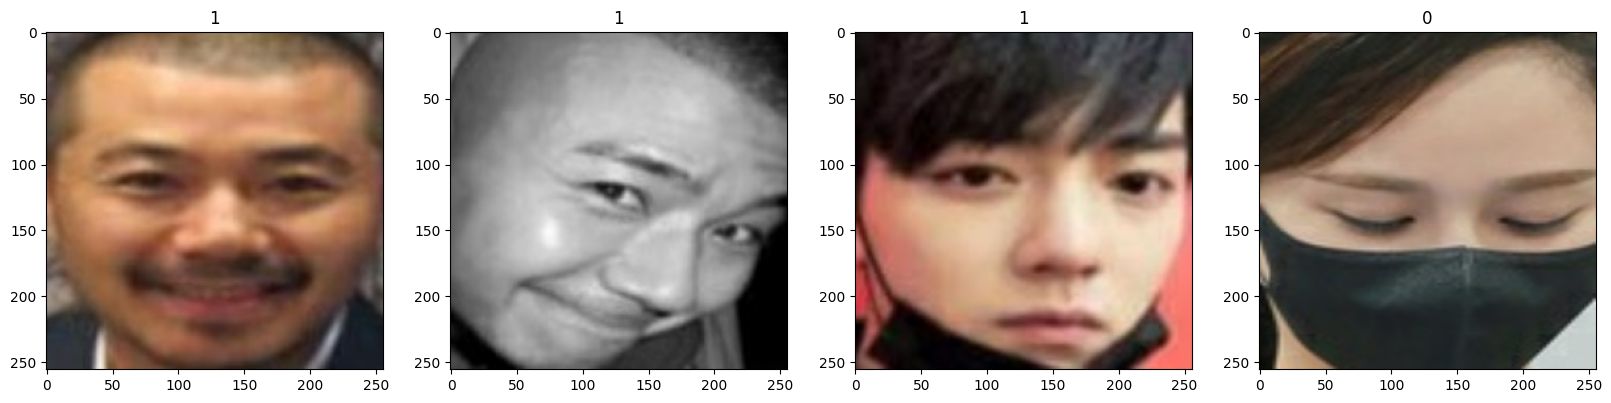

In [35]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [36]:
data = data.map(lambda x,y: (x/255, y))

In [37]:
batch=data.as_numpy_iterator()

In [38]:
batch=batch.next()

In [39]:
len(batch)

2

In [40]:
X = []
y = []
for img_batch, label_batch in data.as_numpy_iterator():
    X.extend(img_batch)
    y.extend(label_batch)
X = np.array(X)
y = np.array(y)

In [41]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, stratify=y_temp, random_state=42)
print("Train class distribution:", np.bincount(y_train))
print("Validation class distribution:", np.bincount(y_val))
print("Test class distribution:", np.bincount(y_test))


Train class distribution: [697 700]
Validation class distribution: [200 200]
Test class distribution: [100 100]


In [42]:
len(X_train),len(X_test),len(X_val)

(1397, 200, 400)

In [43]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)


In [44]:
len(train_ds)

44

In [ ]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

  **RELU , ADAM, DROPOUT , BATCHNORM , BATCHSIZE =32**

In [ ]:
model = Sequential()

In [ ]:

model.add(Conv2D(32, (5,5), strides=1, activation='relu', input_shape=(256,256,3),kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (5,5), strides=1, activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2)))


model.add(Conv2D(128, (3,3), strides=1, activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), strides=1, activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)



model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 252, 252, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 252, 252, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 122, 122, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 122, 122, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 59, 59, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 27, 27, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 27, 27, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      22,151,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,576,833 (86.12 MB)

 Trainable params: 22,575,873 (86.12 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[lr_scheduler]
)


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 37s 436ms/step - accuracy: 0.8190 - loss: 7.2532 - precision: 0.8200 - recall: 0.8017 - val_accuracy: 0.6000 - val_loss: 11.1311 - val_precision: 0.5565 - val_recall: 0.9850 - learning_rate: 0.0010
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9444 - loss: 2.7248 - precision: 0.9375 - recall: 0.9493 - val_accuracy: 0.6725 - val_loss: 21.8541 - val_precision: 0.6042 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.9378 - loss: 2.9154 - precision: 0.9353 - recall: 0.9379 - val_accuracy: 0.5850 - val_loss: 40.2546 - val_precision: 0.5464 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9526 - loss: 2.5263 - precision: 0.9495 - recall: 0.9535
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.9525 - loss: 2.5271 - precision: 0.9495 -

**TEST ACCURACY**

In [ ]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_ds)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 310ms/step - accuracy: 0.8420 - loss: 8.5108 - precision: 0.7589 - recall: 0.9947
Test Accuracy: 0.8400
Test Precision: 0.7615
Test Recall: 0.9900


In [ ]:
y_pred_probs = model.predict(test_ds)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step


In [ ]:
y_test

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0], dtype=int32)

In [ ]:
y_pred = (y_pred_probs > 0.5).astype(int)


In [ ]:
y_pred

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
    

**BATCH SIZE =16 ,LEAKY RELU ,BATCH NORM,SGD MOMENTUM =0.9**

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=16
)

Found 1997 files belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, (5,5), strides=1, activation=LeakyReLU(alpha=0.1), input_shape=(256,256,3),kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (5,5), strides=1, activation=LeakyReLU(alpha=0.1),kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2)))


model.add(Conv2D(128, (3,3), strides=1, activation=LeakyReLU(alpha=0.1),kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), strides=1, activation=LeakyReLU(alpha=0.1),kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512, activation=LeakyReLU(alpha=0.1)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)



model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 252, 252, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 252, 252, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 122, 122, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 122, 122, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 61, 61, 64)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 59, 59, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 27, 27, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 27, 27, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      22,151,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,576,833 (86.12 MB)

 Trainable params: 22,575,873 (86.12 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[lr_scheduler]
)


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 265ms/step - accuracy: 0.7749 - loss: 4.7113 - precision_1: 0.7676 - recall_1: 0.7799 - val_accuracy: 0.4025 - val_loss: 484.8793 - val_precision_1: 0.1905 - val_recall_1: 0.0600 - learning_rate: 0.0100
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.8663 - loss: 11.5822 - precision_1: 0.8521 - recall_1: 0.8800 - val_accuracy: 0.5250 - val_loss: 240.7251 - val_precision_1: 0.5521 - val_recall_1: 0.2650 - learning_rate: 0.0100
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.8785 - loss: 13.6175 - precision_1: 0.8648 - recall_1: 0.8909 - val_accuracy: 0.7350 - val_loss: 110.7681 - val_precision_1: 0.7260 - val_recall_1: 0.7550 - learning_rate: 0.0100
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9239 - loss: 4.4139 - precision_1: 0.9259 - recall_1: 0.9172 - val_accuracy: 0.7425 - val_loss: 14.9147 - val_precision_1: 0.8392 - val_recall_1: 0.6000 - learning_rate: 0.0100
Epoch 5/10
44/44 ━━━━━

In [ ]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_ds)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 285ms/step - accuracy: 0.9633 - loss: 1.2230 - precision_1: 0.9808 - recall_1: 0.9434
Test Accuracy: 0.9600
Test Precision: 0.9792
Test Recall: 0.9400


In [ ]:
y_pred_probs = model.predict(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step


In [ ]:
y_pred = (y_pred_probs > 0.5).astype(int)

In [ ]:
y_test

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0], dtype=int32)

In [ ]:
y_pred

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
    

**BATCH SIZE=64, RMSPROP ,SIGMOID, BINARY CROSS ENTROPY,RELU**

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=64
)

Found 1997 files belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import Adagrad, RMSprop, SGD, Adam ,Adadelta

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5,5), strides=1, activation='relu', input_shape=(256,256,3),kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (5,5), strides=1, activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2)))


model.add(Conv2D(128, (3,3), strides=1, activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), strides=1, activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

optimizer=RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)



model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 252, 252, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 252, 252, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 122, 122, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 122, 122, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 61, 61, 64)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 59, 59, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 27, 27, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 27, 27, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      22,151,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,576,833 (86.12 MB)

 Trainable params: 22,575,873 (86.12 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[lr_scheduler]
)


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 28s 323ms/step - accuracy: 0.7765 - loss: 22.6175 - precision_2: 0.7685 - recall_2: 0.7806 - val_accuracy: 0.5075 - val_loss: 46.8044 - val_precision_2: 0.5038 - val_recall_2: 1.0000 - learning_rate: 0.0010
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.8780 - loss: 11.3714 - precision_2: 0.8682 - recall_2: 0.8883 - val_accuracy: 0.6675 - val_loss: 18.4894 - val_precision_2: 0.6012 - val_recall_2: 0.9950 - learning_rate: 0.0010
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9280 - loss: 4.4095 - precision_2: 0.9252 - recall_2: 0.9278 - val_accuracy: 0.5800 - val_loss: 58.0374 - val_precision_2: 0.5435 - val_recall_2: 1.0000 - learning_rate: 0.0010
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.9366 - loss: 4.2952 - precision_2: 0.9387 - recall_2: 0.9310 - val_accuracy: 0.6700 - val_loss: 41.9630 - val_precision_2: 0.6030 - val_recall_2: 0.9950 - learning_rate: 0.0010
Epoch 5/10
44/44 ━━━━━━━━

In [ ]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_ds)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.9733 - loss: 1.6310 - precision_2: 0.9760 - recall_2: 0.9688
Test Accuracy: 0.9650
Test Precision: 0.9697
Test Recall: 0.9600


In [ ]:
y_pred_probs = model.predict(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step


In [ ]:
y_pred = (y_pred_probs > 0.5).astype(int)

In [ ]:
y_test

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0], dtype=int32)

In [ ]:
y_pred

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
    

**BATCH SIZE=32,TANH,RELU ,ADAM,BINARY CROSS ENTROPHY**

In [45]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=32
)

Found 1997 files belonging to 2 classes.


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, AveragePooling2D, Dropout, Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Model Definition
model = Sequential()
model.add(Conv2D(32, (5,5), strides=1, activation='tanh', input_shape=(256,256,3), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (5,5), strides=1, activation='tanh', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), strides=1, activation='tanh', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), strides=1, activation='tanh', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.001)


model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall()])


lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 252, 252, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 252, 252, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 122, 122, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 122, 122, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 59, 59, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 27, 27, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 27, 27, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      22,151,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,576,833 (86.12 MB)

 Trainable params: 22,575,873 (86.12 MB)

 Non-trainable params: 960 (3.75 KB)

In [47]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[lr_scheduler]
)


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 37s 425ms/step - accuracy: 0.8520 - loss: 1.0220 - precision: 0.8479 - recall: 0.8516 - val_accuracy: 0.6075 - val_loss: 1.6494 - val_precision: 0.5602 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 111ms/step - accuracy: 0.9228 - loss: 0.5519 - precision: 0.9167 - recall: 0.9265 - val_accuracy: 0.6675 - val_loss: 1.3659 - val_precision: 0.6006 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9334 - loss: 0.5226 - precision: 0.9481 - recall: 0.9142 - val_accuracy: 0.7325 - val_loss: 1.1744 - val_precision: 0.6525 - val_recall: 0.9950 - learning_rate: 0.0010
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.8962 - loss: 0.6089 - precision: 0.8976 - recall: 0.8896 - val_accuracy: 0.7350 - val_loss: 1.4070 - val_precision: 0.6546 - val_recall: 0.9950 - learning_rate: 0.0010
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy

In [48]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_ds)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 288ms/step - accuracy: 0.8924 - loss: 0.5030 - precision: 0.8204 - recall: 1.0000
Test Accuracy: 0.9100
Test Precision: 0.8475
Test Recall: 1.0000


In [49]:
y_pred_probs = model.predict(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step


In [50]:
y_pred_probs

array([[9.66267765e-01],
       [2.43126196e-04],
       [9.62099910e-01],
       [2.52192635e-02],
       [7.93789178e-02],
       [4.80958784e-04],
       [6.57592714e-01],
       [9.82932687e-01],
       [9.97508407e-01],
       [9.82102394e-01],
       [1.04005041e-03],
       [9.86357987e-01],
       [9.94359553e-01],
       [2.14657327e-03],
       [9.30323750e-02],
       [9.78411078e-01],
       [8.75134766e-01],
       [9.98571277e-01],
       [9.94283974e-01],
       [2.26541903e-04],
       [9.98170614e-01],
       [9.93257046e-01],
       [9.89799738e-01],
       [9.34336960e-01],
       [7.33002201e-02],
       [9.93537724e-01],
       [6.53151035e-01],
       [9.13225174e-01],
       [9.75027144e-01],
       [1.23929291e-03],
       [9.97163832e-01],
       [9.88902092e-01],
       [8.92314836e-02],
       [9.63044643e-01],
       [9.94540989e-01],
       [9.25792515e-01],
       [1.52710425e-02],
       [5.12171201e-02],
       [8.81617796e-03],
       [6.24359294e-04],


**BATCH SIZE=16,SOFTMAX,LEAKY RELU ,ADAGRAD,CATEGORICAL CROSS ENTROPHY**

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=16
)

Found 1997 files belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import Adagrad, RMSprop, SGD, Adam ,Adadelta

In [ ]:
train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=2)))
val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, depth=2)))
test_ds = test_ds.map(lambda x, y: (x, tf.one_hot(y, depth=2)))

In [ ]:
from tensorflow.keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, (5,5), strides=1, activation=LeakyReLU(alpha=0.1), input_shape=(256,256,3),kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (5,5), strides=1, activation=LeakyReLU(alpha=0.1),kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2)))


model.add(Conv2D(128, (3,3), strides=1, activation=LeakyReLU(alpha=0.1),kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), strides=1, activation=LeakyReLU(alpha=0.1),kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512, activation=LeakyReLU(alpha=0.1)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

optimizer=Adagrad(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)



model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 252, 252, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 252, 252, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 122, 122, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 122, 122, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 61, 61, 64)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 59, 59, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 27, 27, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 27, 27, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │      22,151,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,577,346 (86.13 MB)

 Trainable params: 22,576,386 (86.12 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[lr_scheduler]
)


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 304ms/step - accuracy: 0.7887 - loss: 9.3756 - precision_3: 0.7887 - recall_3: 0.7887 - val_accuracy: 0.6875 - val_loss: 5.9879 - val_precision_3: 0.6875 - val_recall_3: 0.6875 - learning_rate: 0.0100
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.9463 - loss: 1.2125 - precision_3: 0.9463 - recall_3: 0.9463 - val_accuracy: 0.6675 - val_loss: 11.8957 - val_precision_3: 0.6675 - val_recall_3: 0.6675 - learning_rate: 0.0100
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9529 - loss: 0.9574 - precision_3: 0.9529 - recall_3: 0.9529 - val_accuracy: 0.6850 - val_loss: 7.3627 - val_precision_3: 0.6850 - val_recall_3: 0.6850 - learning_rate: 0.0100
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.9604 - loss: 0.6628 - precision_3: 0.9604 - recall_3: 0.9604 - val_accuracy: 0.7450 - val_loss: 5.8625 - val_precision_3: 0.7450 - val_recall_3: 0.7450 - learning_rate: 0.0100
Epoch 5/10
44/44 ━━━━━━━━━━━━━

In [ ]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_ds)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 349ms/step - accuracy: 0.9619 - loss: 0.9064 - precision_3: 0.9619 - recall_3: 0.9619
Test Accuracy: 0.9550
Test Precision: 0.9550
Test Recall: 0.9550


In [ ]:
y_pred_probs = model.predict(test_ds)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step


In [ ]:
y_pred_probs

array([[4.65330814e-08, 1.00000000e+00],
       [1.00000000e+00, 5.80521723e-18],
       [1.32442549e-12, 1.00000000e+00],
       [1.00000000e+00, 1.61189758e-17],
       [1.00000000e+00, 7.19076339e-15],
       [1.00000000e+00, 6.84586597e-15],
       [1.00000000e+00, 4.12910754e-13],
       [1.07913526e-12, 1.00000000e+00],
       [2.38737940e-17, 1.00000000e+00],
       [1.58138342e-18, 1.00000000e+00],
       [1.00000000e+00, 1.49425700e-25],
       [2.98916552e-06, 9.99997020e-01],
       [3.86017295e-11, 1.00000000e+00],
       [1.00000000e+00, 1.45920012e-21],
       [1.00000000e+00, 1.63244618e-08],
       [2.79651709e-13, 1.00000000e+00],
       [1.00000000e+00, 5.93925179e-20],
       [5.49631929e-15, 1.00000000e+00],
       [4.70255060e-07, 9.99999523e-01],
       [1.00000000e+00, 2.83613161e-10],
       [7.71261576e-24, 1.00000000e+00],
       [7.11675558e-15, 1.00000000e+00],
       [2.13908571e-10, 1.00000000e+00],
       [9.99999762e-01, 1.92425361e-07],
       [1.000000

In [ ]:
y_test

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0], dtype=int32)

In [ ]:
y_pred = []
for x,y in y_pred_probs:
  if x>y:
    y_pred.append(0)
  else:
    y_pred.append(1)

In [ ]:
y_pred=np.array(y_pred)

In [ ]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0])

**BATCH SIZE=64,SOFTMAX,RELU ,ADADELTA,CATEGORICAL CROSS ENTROPHY**

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=64
)

Found 1997 files belonging to 2 classes.


In [86]:
from tensorflow.keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, (5,5), strides=1, activation=LeakyReLU(alpha=0.1), input_shape=(256,256,3),kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (5,5), strides=1, activation=LeakyReLU(alpha=0.1),kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2)))


model.add(Conv2D(128, (3,3), strides=1, activation=LeakyReLU(alpha=0.1),kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), strides=1, activation=LeakyReLU(alpha=0.1),kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512, activation=LeakyReLU(alpha=0.1)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

optimizer=Adadelta(learning_rate=1.0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)



model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 252, 252, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 252, 252, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 122, 122, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 122, 122, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_6                  │ (None, 61, 61, 64)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 59, 59, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 27, 27, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 27, 27, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │      22,151,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,577,346 (86.13 MB)

 Trainable params: 22,576,386 (86.12 MB)

 Non-trainable params: 960 (3.75 KB)

In [87]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[lr_scheduler]
)


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 366ms/step - accuracy: 0.7688 - loss: 20.4402 - precision_5: 0.7688 - recall_5: 0.7688 - val_accuracy: 0.5650 - val_loss: 7.0518 - val_precision_5: 0.5650 - val_recall_5: 0.5650 - learning_rate: 1.0000
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step - accuracy: 0.9094 - loss: 3.1397 - precision_5: 0.9094 - recall_5: 0.9094 - val_accuracy: 0.5150 - val_loss: 21.1163 - val_precision_5: 0.5150 - val_recall_5: 0.5150 - learning_rate: 1.0000
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9299 - loss: 2.8401 - precision_5: 0.9299 - recall_5: 0.9299 - val_accuracy: 0.5875 - val_loss: 11.0025 - val_precision_5: 0.5875 - val_recall_5: 0.5875 - learning_rate: 1.0000
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9441 - loss: 1.2649 - precision_5: 0.9441 - recall_5: 0.9441
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.5.
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9443 - loss: 1.2641 - precisio

In [90]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_ds)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9720 - loss: 0.8956 - precision_5: 0.9720 - recall_5: 0.9720
Test Accuracy: 0.9700
Test Precision: 0.9700
Test Recall: 0.9700


In [91]:
y_pred_probs = model.predict(test_ds)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [92]:
y_test

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0], dtype=int32)

In [93]:
y_pred = []
for x,y in y_pred_probs:
  if x>y:
    y_pred.append(0)
  else:
    y_pred.append(1)

In [94]:
y_pred=np.array(y_pred)

In [95]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0])